# Multiple Linear Regression

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

In the previous section we performed linear regression involving two variables. Almost all real world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called "multiple linear regression". 

In this section we will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.

In [1]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline


__At the beginning of regression analysis, a dataset can be split into two groups:__

__A training dataset and a testing dataset.__

__The training dataset can be used to create a model to figure out the best approach to apply the line of best fit into the graph.__

__The test dataset (or subset) in order to test our model’s prediction__

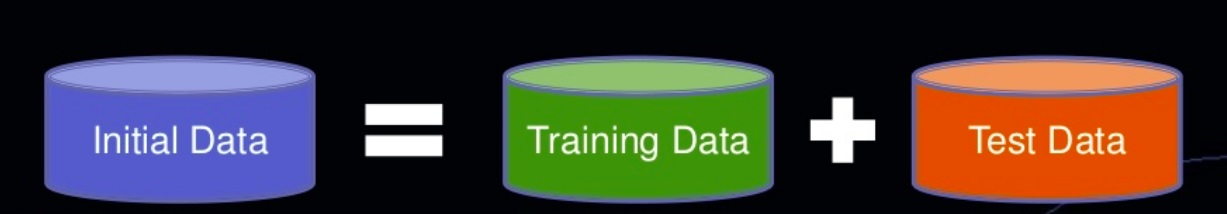

# Sklearn 

__Sklearn (or Scikit-learn) is a Python library that offers various features for data processing that can be used for classification, clustering, and model selection.__

# train_test_split

__train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function,__


__Syntex: train_test_split(X, y, train_size=0.*,test_size=0.*, random_state=*)__

__1. X, y. The first parameter is the dataset you're selecting to use.__

__2. train_size. This parameter sets the size of the training dataset. There are three options: None, which is the default, Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.__

__3. test_size. This parameter specifies the size of the testing dataset. The default state suits the training size. It will be set to 0.25 if the training size is set to default.__


__4. random_state. Here you pass an integer, which will act as the seed for the random number generator during the split.If you don’t pass anything, the RandomState instance used by np.random will be used instead.
__

In [2]:
X =  list(range(15))
print (X)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [3]:
y = [x * x for x in X]
print (y)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196]


In [4]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=0)
print ("X_train: ", X_train)


X_train:  [2, 13, 10, 7, 11, 3, 0, 5, 12]


In [5]:
print ("y_train: ", y_train)


y_train:  [4, 169, 100, 49, 121, 9, 0, 25, 144]


In [6]:
print("X_test: ", X_test)


X_test:  [1, 6, 8, 9, 14, 4]


In [7]:
print ("y_test: ", y_test)

y_test:  [1, 36, 64, 81, 196, 16]


__Note: Sklearn train_test_split function ignores the original sequence of numbers. After a split, they can be presented in a different order.__

__The ideal split is said to be 80:20 for training and testing.__

# Example 01

In [8]:
# Importing the Dataset
dataset = pd.read_csv('NMIMS_petrol_consumption.csv')

dataset.head() 

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [9]:
# To see statistical details of the dataset, execute the following command:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [10]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

# Visulaization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD905035F8>,
      dtype=object)

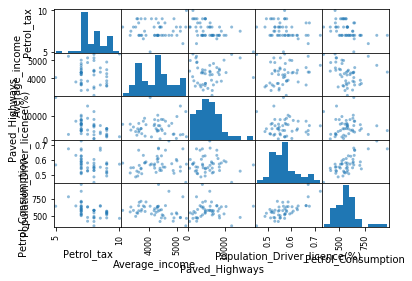

In [11]:
pd.plotting.scatter_matrix(dataset)

# Correlation coeficient

In [12]:
corrMatrix = dataset.corr()
print (corrMatrix)

                              Petrol_tax  Average_income  Paved_Highways  \
Petrol_tax                      1.000000        0.012665       -0.522130   
Average_income                  0.012665        1.000000        0.050163   
Paved_Highways                 -0.522130        0.050163        1.000000   
Population_Driver_licence(%)   -0.288037        0.157070       -0.064129   
Petrol_Consumption             -0.451280       -0.244862        0.019042   

                              Population_Driver_licence(%)  Petrol_Consumption  
Petrol_tax                                       -0.288037           -0.451280  
Average_income                                    0.157070           -0.244862  
Paved_Highways                                   -0.064129            0.019042  
Population_Driver_licence(%)                      1.000000            0.698965  
Petrol_Consumption                                0.698965            1.000000  


# Fitting of regression model

 __import the LinearRegression model from sklearn_model__
 
 __fit() method along with our training data:__
 
regressor = LinearRegression() 

regressor.fit(X_train, y_train) 

__To retrieve the intercept:__

print(regressor.intercept_)

__For retrieving the slope (coefficient of x):__

regressor.coef_

__Create a pandas dataframe for all xi coefficents"__

coeff_dMaking Predictionsf = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 

__Testing the model from testing data__

y_pred = regressor.predict(X_test)  


In [13]:
# Preparing the Data

# divide the data into attributes and labels
X = dataset.drop('Petrol_Consumption', axis=1)  #axis=0 scan row wise and axis=1 scan column wise

y = dataset['Petrol_Consumption']  

# dividing data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

# Training and Making Predictions
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  

regressor.fit(X_train, y_train) 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  

coeff_df



,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


__This means that for a unit increase in "petroltax", there is a decrease of 24.19 million gallons in gas consumption.__

__Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption.__

__We can see that "Averageincome" and "Paved_Highways" have a very little effect on the gas consumption.__

In [14]:
# Making Predictions
y_pred = regressor.predict(X_test)  

# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  

df  

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


# Error terms

In [15]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 56.82224747896471
Mean Squared Error: 4666.344787588363
Root Mean Squared Error: 68.3106491521517


__You can see that the value of root mean squared error is 68.31, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.__


# R square value: Coefficient of determination

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2036193241012173

# Lab Exercise

In [17]:
#Fit a regression model for Real estate.csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [18]:
df = pd.read_csv("NMIMS_Real Estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [19]:
df.shape

(414, 8)

In [20]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [21]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD904A8668>,
      dtype=object)

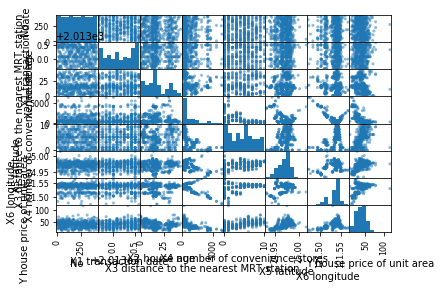

In [22]:
pd.plotting.scatter_matrix(df)

In [23]:
corrMatrix = df.corr()
corrMatrix

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [24]:
X = df.drop("Y house price of unit area", axis = 1)
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486


In [25]:
y = df["Y house price of unit area"]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
5      32.1
6      40.3
7      46.7
8      18.8
9      22.1
10     41.4
11     58.1
12     39.3
13     23.8
14     34.3
15     50.5
16     70.1
17     37.4
18     42.3
19     47.7
20     29.3
21     51.6
22     24.6
23     47.9
24     38.8
25     27.0
26     56.2
27     33.6
28     47.0
29     57.1
       ... 
384    12.9
385    46.6
386    55.3
387    25.6
388    27.3
389    67.7
390    38.6
391    31.3
392    35.3
393    40.3
394    24.7
395    42.5
396    31.9
397    32.2
398    23.0
399    37.3
400    35.5
401    27.7
402    28.5
403    39.7
404    41.2
405    37.2
406    40.5
407    22.3
408    28.1
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [26]:
model = LinearRegression()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print("Slope :", model.coef_)

Slope : [-4.46160493e-03  4.87351872e+00 -2.62784478e-01 -4.51739716e-03
  1.08106433e+00  2.26077610e+02 -9.84541197e+00]


In [30]:
print("Intercept: ", model.intercept_)

Intercept:  -14215.411161534268


In [31]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
No,-0.004462
X1 transaction date,4.873519
X2 house age,-0.262784
X3 distance to the nearest MRT station,-0.004517
X4 number of convenience stores,1.081064
X5 latitude,226.077610
X6 longitude,-9.845412


In [32]:
y_pred = model.predict(X_test) 

In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
356,45.3,39.582394
170,14.4,12.951683
224,46.0,41.923561
331,15.6,12.045238
306,50.2,42.059470
325,38.1,39.286282
150,48.5,40.799997
10,41.4,34.840495
21,51.6,50.150184
268,40.1,45.575963


In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 5.776541798116217
Mean Squared Error: 59.79820550973972
Root Mean Squared Error: 7.732929943413409


In [35]:
r2_score(y_test, y_pred)

0.6557366417644837

In [67]:
#Fit a regression model for following file:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [68]:
dataset = pd.read_csv('NMIMS_movie_boxoffice.csv', encoding='ISO-8859–1')
dataset.head()

,Movie Name,Budget,Youtube Views,Youtube Likes,Youtube Dislikes,Box Office Collection
0,2 States,36.0,8576361.0,26622.0,2527.0,104.00
1,Table No. 21,10.0,1087320.0,1129.0,137.0,12.00
2,Amit Sahni Ki List,10.0,572336.0,586.0,54.0,4.00
3,Rajdhani Express,7.0,42626.0,86.0,19.0,0.35
4,Bobby Jasoos,18.0,3113427.0,4512.0,1224.0,10.80


In [69]:
dataset.shape

(150, 6)

In [70]:
dataset.columns

Index(['Movie Name', 'Budget', 'Youtube Views', 'Youtube Likes',
       'Youtube Dislikes', 'Box Office Collection'],
      dtype='object')

In [71]:
dataset.isnull().sum()

Movie Name               1
Budget                   1
Youtube Views            1
Youtube Likes            1
Youtube Dislikes         1
Box Office Collection    0
dtype: int64

In [72]:
df = dataset.dropna()
df

,Movie Name,Budget,Youtube Views,Youtube Likes,Youtube Dislikes,Box Office Collection
0,2 States,36.0,8576361.0,26622.0,2527.0,104.00
1,Table No. 21,10.0,1087320.0,1129.0,137.0,12.00
2,Amit Sahni Ki List,10.0,572336.0,586.0,54.0,4.00
3,Rajdhani Express,7.0,42626.0,86.0,19.0,0.35
4,Bobby Jasoos,18.0,3113427.0,4512.0,1224.0,10.80
5,Citylights,7.0,1076591.0,1806.0,84.0,35.00
6,Daawat-E-Ishq,30.0,3905050.0,8315.0,1373.0,24.60
7,Matru Ki Bijlee Ka Mandola,33.0,2435283.0,4326.0,647.0,40.00
8,Dedh Ishqiya,31.0,2333067.0,2436.0,591.0,27.00
9,Gangoobai,2.0,4354.0,1.0,1.0,0.01


In [73]:
df.shape

(149, 6)

In [75]:
df.isnull().sum()

Movie Name               0
Budget                   0
Youtube Views            0
Youtube Likes            0
Youtube Dislikes         0
Box Office Collection    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD941E8B70>,
      dtype=object)

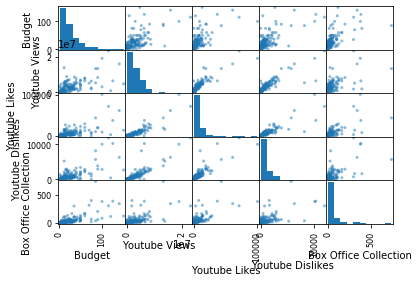

In [76]:
pd.plotting.scatter_matrix(df)

In [77]:
corrMatrix = df.corr()
corrMatrix

,Budget,Youtube Views,Youtube Likes,Youtube Dislikes,Box Office Collection
Budget,1.000000,0.589038,0.608916,0.665343,0.650401
Youtube Views,0.589038,1.000000,0.884055,0.846739,0.588632
Youtube Likes,0.608916,0.884055,1.000000,0.859730,0.682517
Youtube Dislikes,0.665343,0.846739,0.859730,1.000000,0.623941
Box Office Collection,0.650401,0.588632,0.682517,0.623941,1.000000


In [78]:
X = df.drop("Box Office Collection", axis = 1)
X

,Movie Name,Budget,Youtube Views,Youtube Likes,Youtube Dislikes
0,2 States,36.0,8576361.0,26622.0,2527.0
1,Table No. 21,10.0,1087320.0,1129.0,137.0
2,Amit Sahni Ki List,10.0,572336.0,586.0,54.0
3,Rajdhani Express,7.0,42626.0,86.0,19.0
4,Bobby Jasoos,18.0,3113427.0,4512.0,1224.0
5,Citylights,7.0,1076591.0,1806.0,84.0
6,Daawat-E-Ishq,30.0,3905050.0,8315.0,1373.0
7,Matru Ki Bijlee Ka Mandola,33.0,2435283.0,4326.0,647.0
8,Dedh Ishqiya,31.0,2333067.0,2436.0,591.0
9,Gangoobai,2.0,4354.0,1.0,1.0


In [79]:
y = df["Box Office Collection"]
y

0      104.00
1       12.00
2        4.00
3        0.35
4       10.80
5       35.00
6       24.60
7       40.00
8       27.00
9        0.01
10       6.00
11      10.25
12     105.50
13       1.80
14     163.00
15       0.09
16     162.00
17       6.00
18      58.90
19      12.60
20       3.65
21      14.30
22      76.70
23      69.00
24      21.50
25     103.00
26     383.00
27      44.00
28      27.16
29      10.00
        ...  
119    300.00
120     12.00
121      1.10
122      2.00
123     12.65
124     40.00
125      7.50
126      1.50
127     45.00
128     40.00
129      6.00
130     18.20
131     55.00
132    298.00
133     22.00
134     34.00
135     85.00
136     56.00
137     25.00
138    125.00
139     30.25
140     14.02
141     38.00
142     58.00
143     77.00
144     30.00
145     32.10
146     12.00
147     11.89
148    120.00
Name: Box Office Collection, Length: 149, dtype: float64

In [80]:
model = LinearRegression()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'ABCD Any Body Can Dance'